In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('/content/data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [42]:
df.shape

(2227, 3)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [44]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [45]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [46]:
df=df.dropna()

In [47]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [48]:
df['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

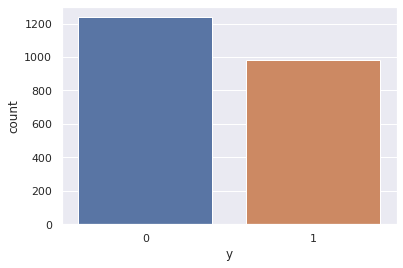

In [49]:
sns.countplot(x='y',data=df)

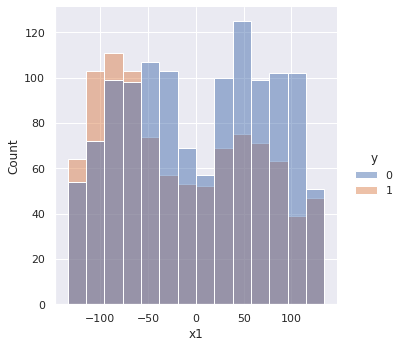

In [50]:
sns.set_theme(style='darkgrid')
sns.displot(x='x1',hue='y',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59975ade50>,
      dtype=object)

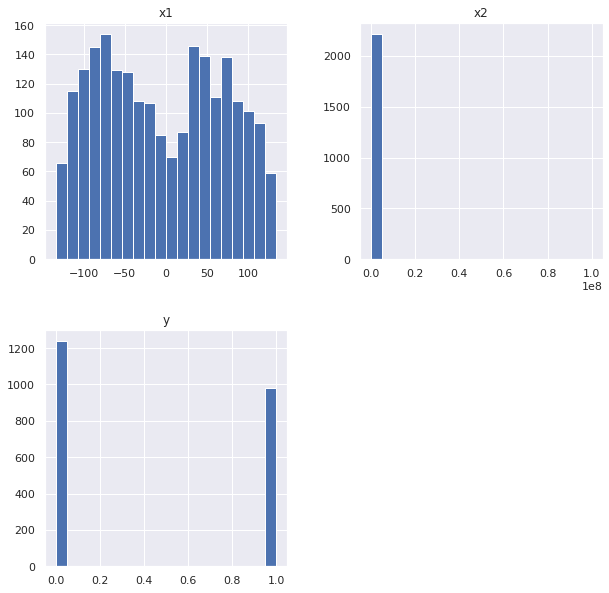

In [51]:
df.hist(bins=20,figsize=(10,10))


Inference:
From the figure we can say that the x1 independent variable is normally distributed whereas the x2 is not normally distributed.

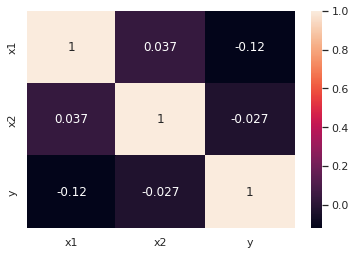

In [52]:
sns.heatmap(df.corr(),annot=True)

In [53]:
y=df.y.copy()
X=df.drop(['y'],axis=1)

Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
ln_pred=model.predict(x_test)
print(ln_pred)
print(model.score(x_test,y_test))

[0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1]
0.536036036036036


In [65]:
from sklearn.metrics import mean_squared_error
 
from sklearn.metrics import classification_report
MSE = mean_squared_error(y_test,ln_pred)
RMSE = np.sqrt(MSE)
print('mean squared error is : ',MSE)
 
print('root mean squared error is : ',RMSE)
 
print(classification_report(y_test,ln_pred))

mean squared error is :  0.46396396396396394
root mean squared error is :  0.6811490027622179
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       266
           1       0.44      0.60      0.51       178

    accuracy                           0.54       444
   macro avg       0.55      0.55      0.53       444
weighted avg       0.57      0.54      0.54       444



In [67]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
sv_predict=model.predict(x_test)
sv_Score=model.score(x_test,y_test)
print(sv_Score)

0.5990990990990991


In [73]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
sv1_predict=model.predict(x_test)
sv1_Score=model.score(x_test,y_test)
print(sv1_Score)

0.5990990990990991


In [75]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)

In [76]:
dcs=classifier.predict(x_test)
dcss=classifier.score(x_test,y_test)
print(dcss)

0.9369369369369369


In [77]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
knn_p=classifier.predict(x_test)
knn_s=classifier.score(x_test,y_test)
print(knn_s)

0.9527027027027027


In [85]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [90]:
from sklearn import model_selection 
results = []
names = []
scoring = 'accuracy'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10, random_state=40)
         cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_i

LR: 0.553764 (0.064490)
KNN: 0.945353 (0.019542)
CART: 0.937469 (0.019765)
SVM: 0.588053 (0.117333)


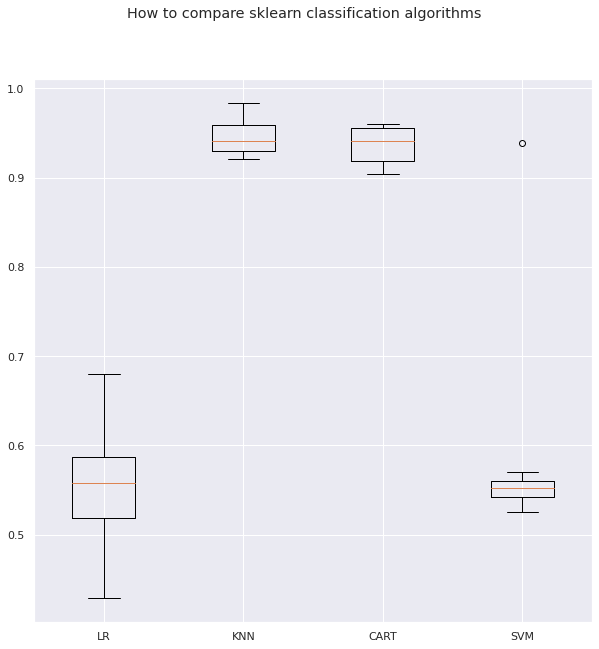

In [93]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Conclusion

We can do more tuning in order to get best fit of model.
From the above Kfold we can say that the Decision Tree and KNN model performs good compared to other models.